In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


# Import Libraries


In [2]:
#%% -------------------------------------------------
# Import Libraries
# -------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectKBest, chi2


# Load Dataset

In [3]:
#%% -------------------------------------------------
# Load Dataset
# -------------------------------------------------
file_path = r'/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv'
Datasets = pd.read_csv(file_path)
print(Datasets.head())
print(Datasets.info())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Handle Date & Time

In [4]:
#%% -------------------------------------------------
# Handle Date & Time
# -------------------------------------------------
Datasets['Date'] = pd.to_datetime(Datasets['Date'], errors='coerce')
Datasets['Time'] = pd.to_datetime(Datasets['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Handle Missing Values

In [5]:
#%% -------------------------------------------------
# Handle Missing Values
# -------------------------------------------------
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 
            'Driver Ratings', 'Customer Rating']
for col in num_cols:
    Datasets[col].fillna(Datasets[col].median(), inplace=True)

Datasets['Payment Method'].fillna(Datasets['Payment Method'].mode()[0], inplace=True)

/tmp/ipykernel_13/2017073921.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Datasets[col].fillna(Datasets[col].median(), inplace=True)
/tmp/ipykernel_13/2017073921.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# Encode Categorical Features

In [6]:
#%% -------------------------------------------------
# Encode Categorical Features
# -------------------------------------------------
le = LabelEncoder()

categorical_cols = [
    'Vehicle Type_Bike','Vehicle Type_Go Mini','Vehicle Type_Go Sedan',
    'Vehicle Type_Premier Sedan','Vehicle Type_Uber XL',
    'Payment Method_Credit Card','Payment Method_Debit Card',
    'Payment Method_UPI','Payment Method_Uber Wallet',
    'Pickup Location','Drop Location',
    'Reason for cancelling by Customer','Driver Cancellation Reason',
    'Incomplete Rides Reason','Booking Status'
]

for col in categorical_cols:
    if col in Datasets.columns:
        Datasets[col] = le.fit_transform(Datasets[col].astype(str))

# Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


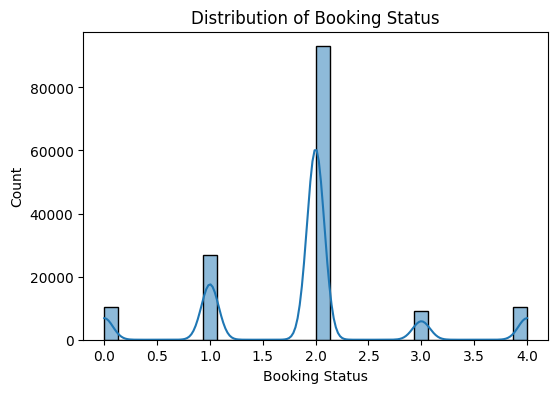

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


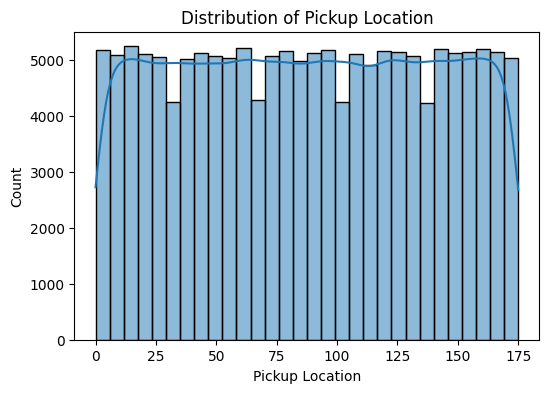

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


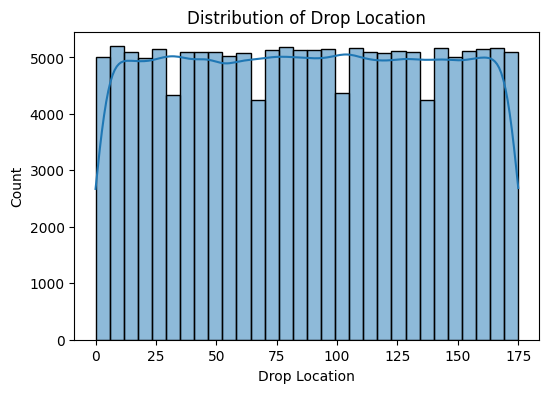

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


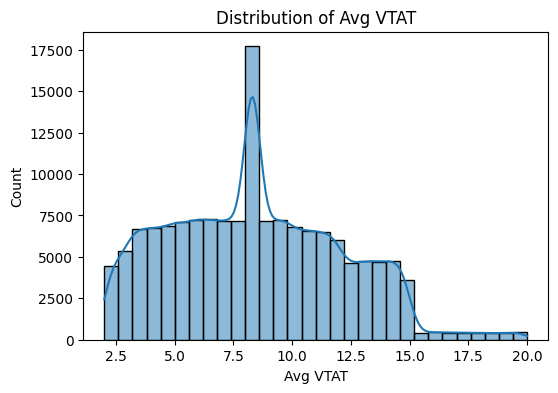

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


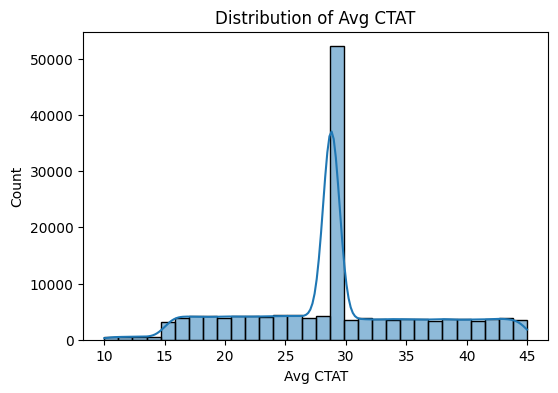

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


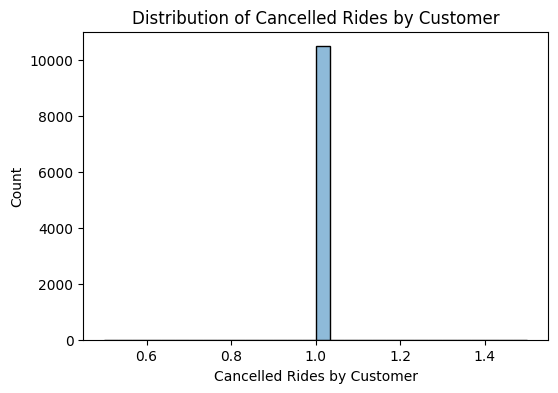

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


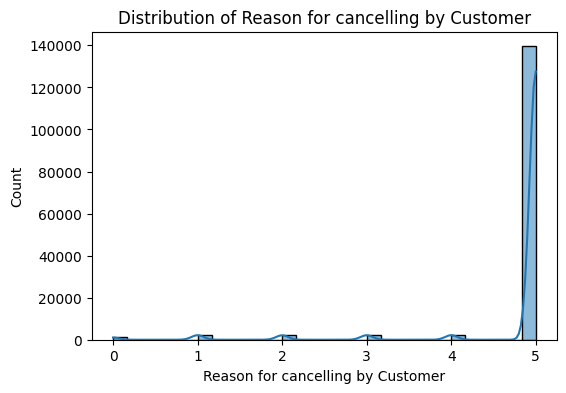

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


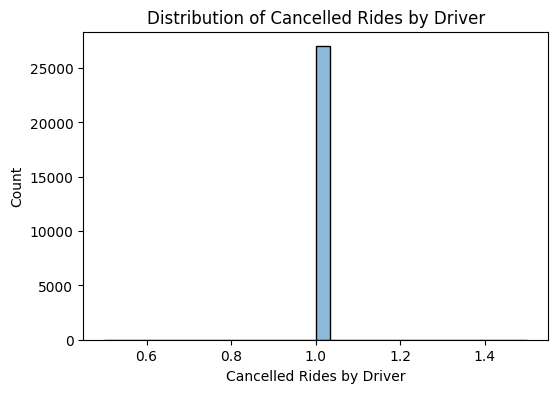

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


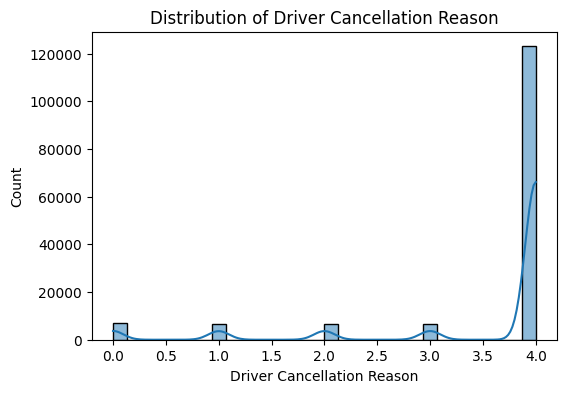

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


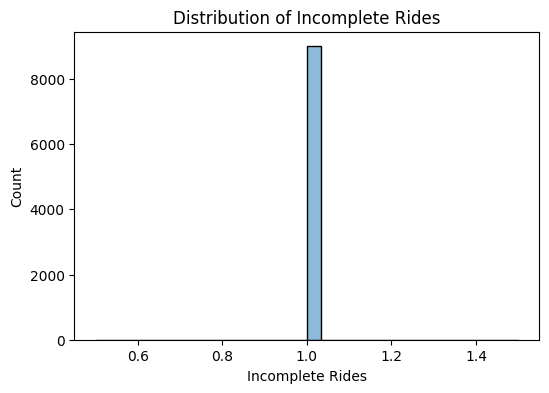

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


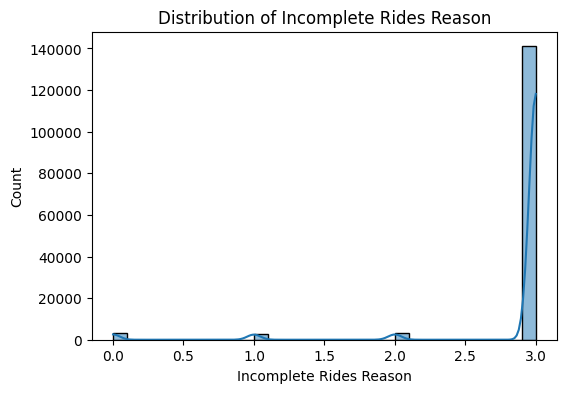

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


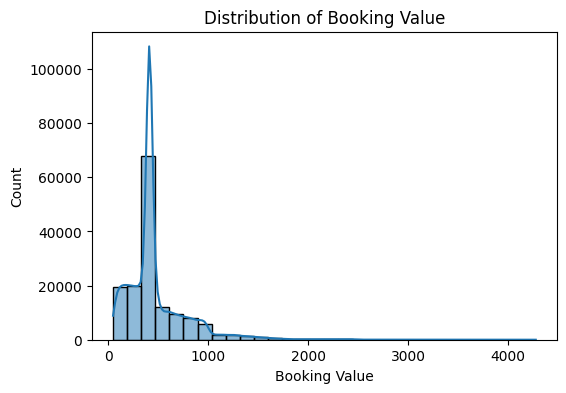

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


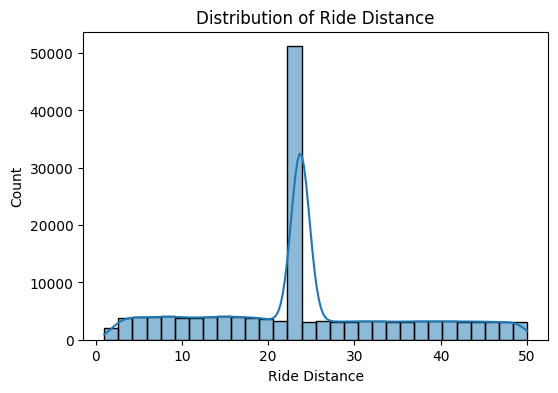

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


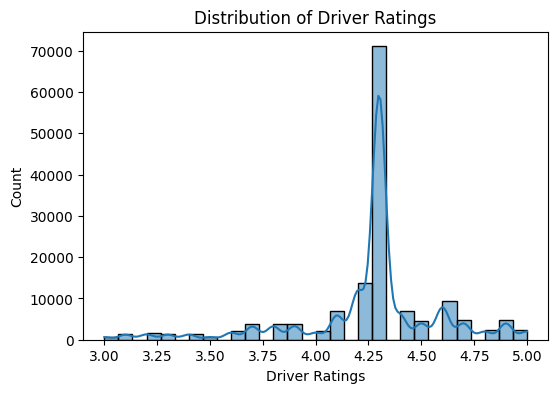

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


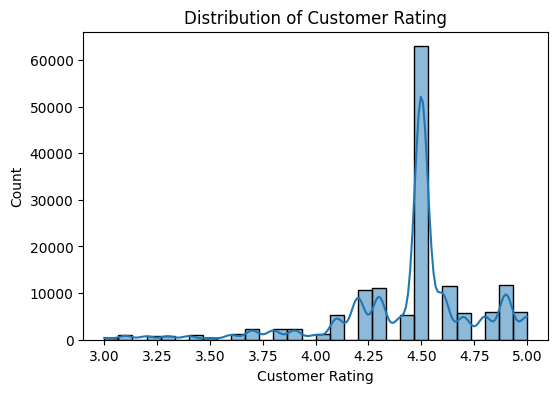

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


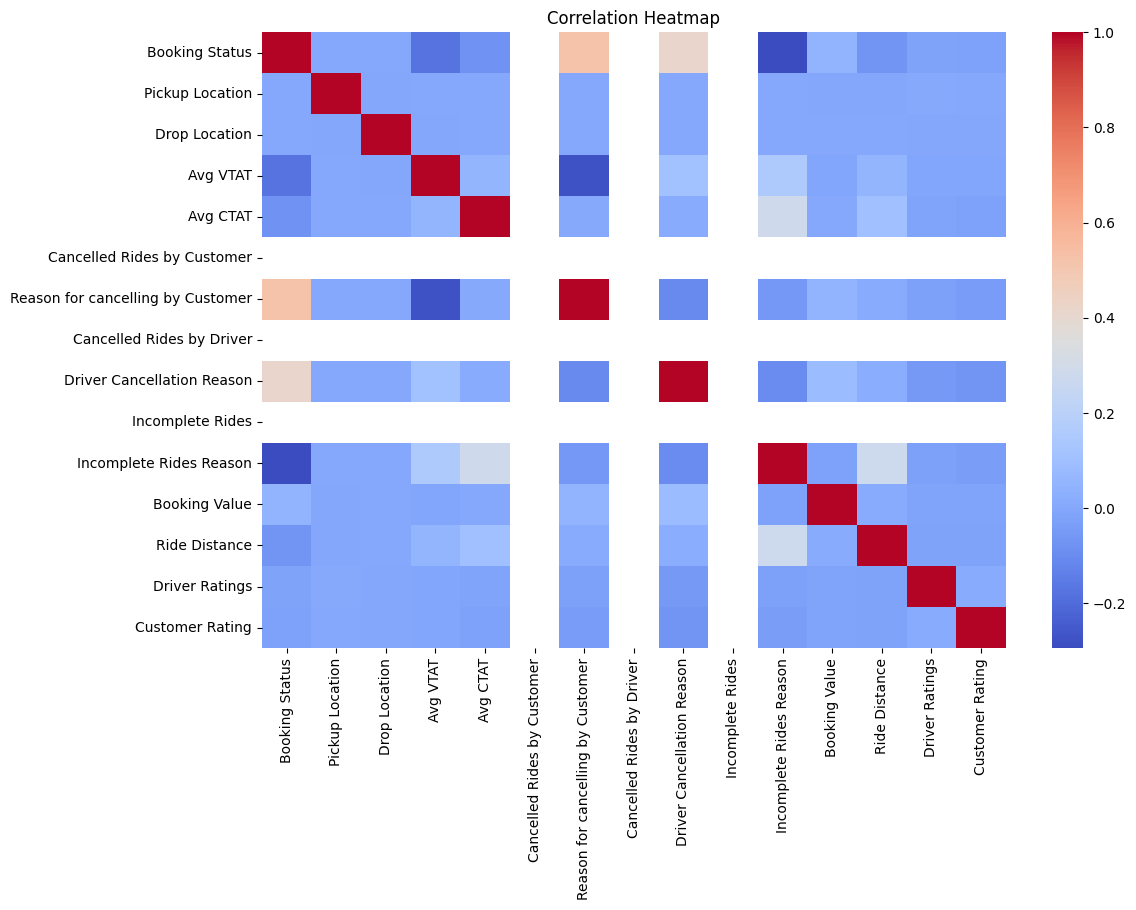

In [7]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------

numeric_data = Datasets.select_dtypes(include=['int64','float64'])

for col in Datasets.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(Datasets[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


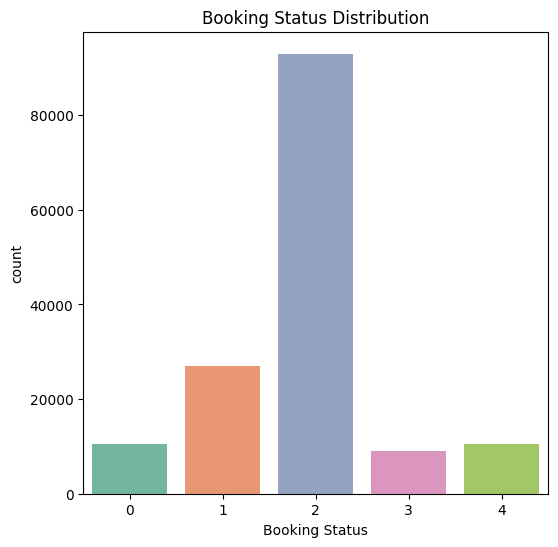

In [8]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------
plt.figure(figsize=(6,6))
sns.countplot(x='Booking Status', data=Datasets, palette="Set2")
plt.title("Booking Status Distribution")
plt.show()

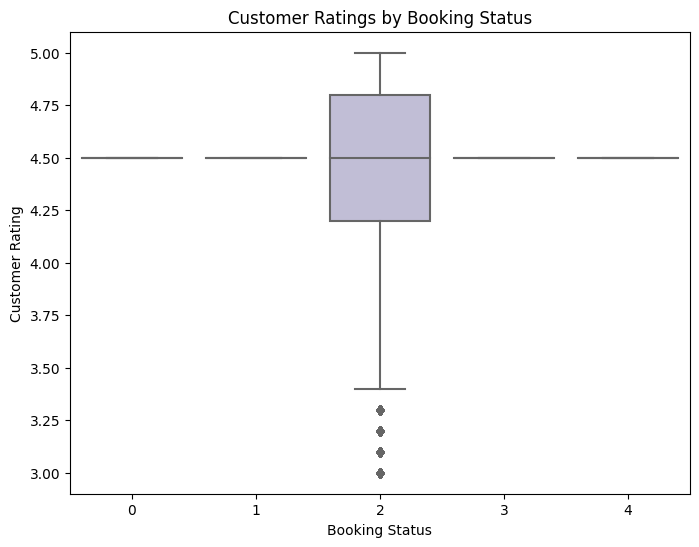

In [9]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x="Booking Status", y="Customer Rating", data=Datasets, palette="Set3")
plt.title("Customer Ratings by Booking Status")
plt.show()

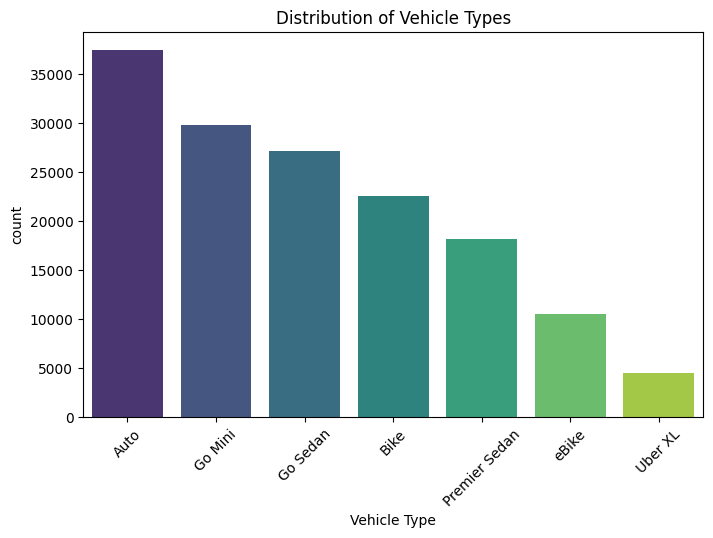

In [10]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x="Vehicle Type", data=Datasets, order=Datasets["Vehicle Type"].value_counts().index, palette="viridis")
plt.title("Distribution of Vehicle Types")
plt.xticks(rotation=45)
plt.show()

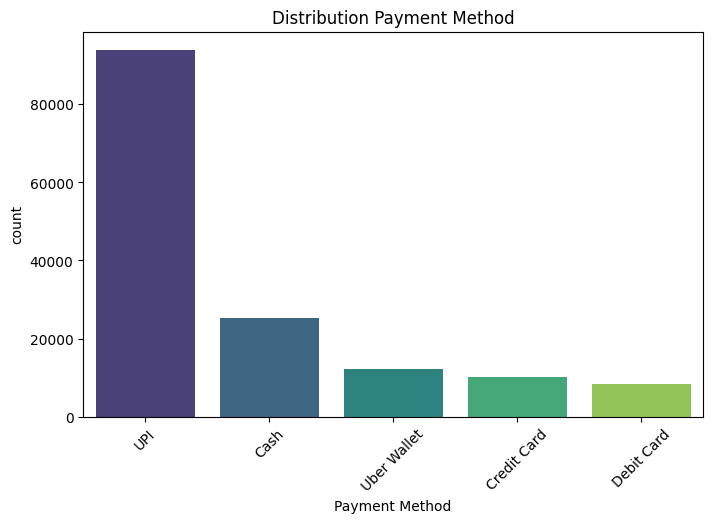

In [11]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x="Payment Method", data=Datasets, order=Datasets['Payment Method'].value_counts().index, palette="viridis")
plt.title("Distribution Payment Method")
plt.xticks(rotation=45)
plt.show()

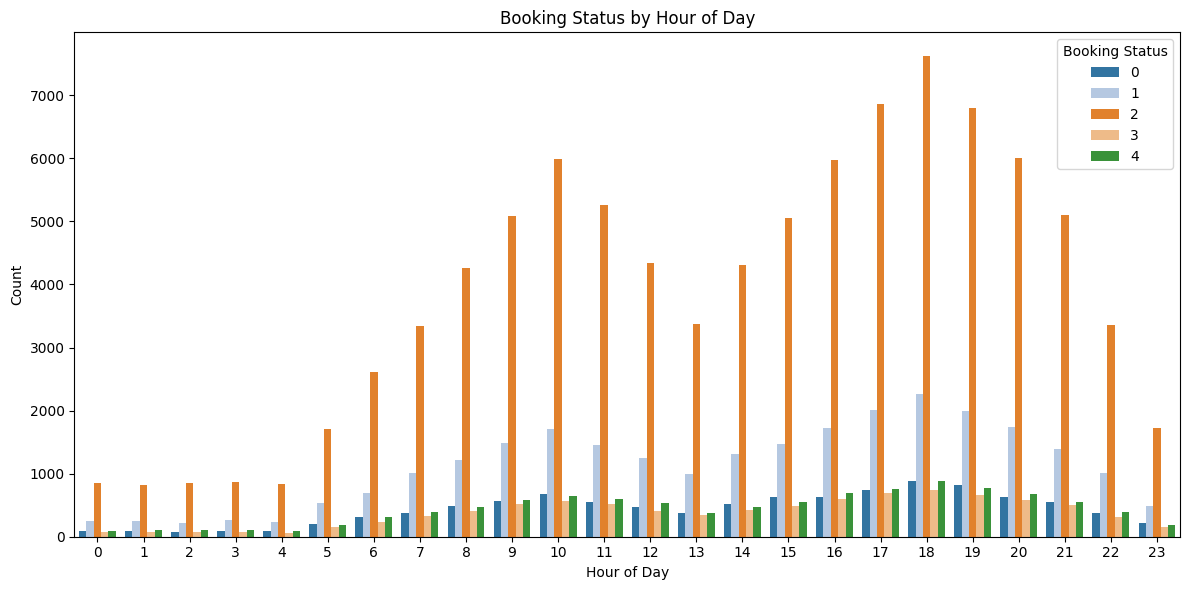

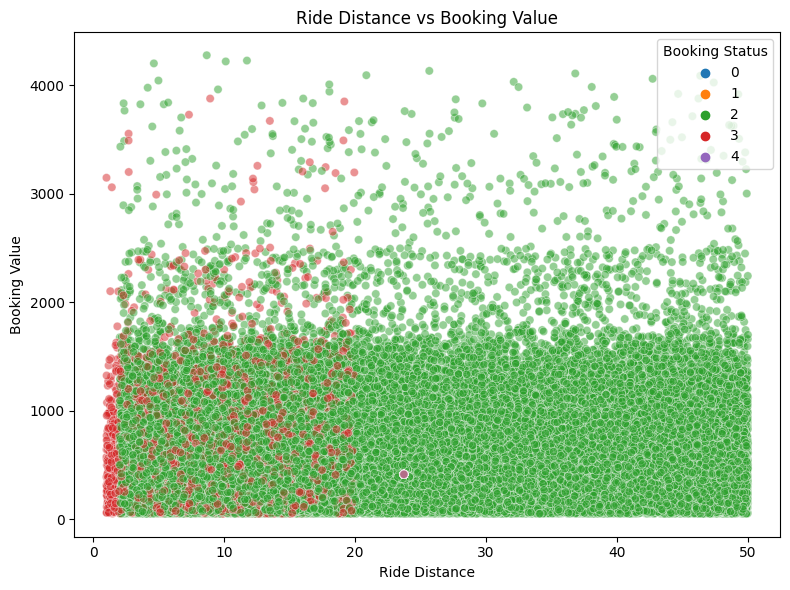

In [12]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------

Datasets['Hour'] = pd.to_datetime(
    Datasets['Time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

Datasets['Booking Status'] = Datasets['Booking Status'].astype('category')

plot_df = Datasets.dropna(subset=['Hour', 'Booking Status'])

plt.figure(figsize=(12,6))
sns.countplot(x="Hour", data=plot_df, hue="Booking Status", palette="tab20")
plt.title("Booking Status by Hour of Day")
plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

scatter_df = Datasets.dropna(subset=['Ride Distance', 'Booking Value', 'Booking Status'])
plt.figure(figsize=(8,6))
sns.scatterplot(x="Ride Distance", y="Booking Value", data=scatter_df,
                hue="Booking Status", alpha=0.5)
plt.title("Ride Distance vs Booking Value")
plt.tight_layout()
plt.show()


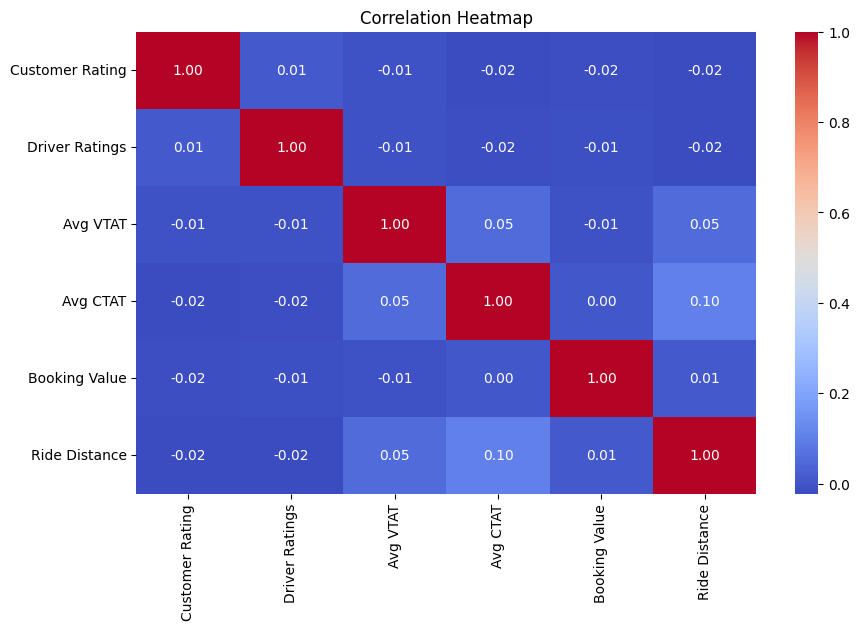

In [13]:
#%% -------------------------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(Datasets[['Customer Rating','Driver Ratings','Avg VTAT','Avg CTAT','Booking Value','Ride Distance']].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection

In [14]:
#%% -------------------------------------------------
# Feature Selection
# -------------------------------------------------
X = Datasets.drop(['Booking ID','Customer ID','Booking Status',
                   'Reason for cancelling by Customer',
                   'Driver Cancellation Reason',
                   'Incomplete Rides Reason',
                   'Date','Time','Timestamp', 'Cancelled Rides by Customer',
                   'Cancelled Rides by Driver','Incomplete Rides' ], axis=1, errors='ignore')

y = Datasets['Booking Status']

# ناخد الأعمدة الرقمية فقط
X = X.select_dtypes(include=['int64','float64'])

best_features = SelectKBest(score_func=chi2, k=8)
fit = best_features.fit(X, y)

featureScores = pd.DataFrame({"Feature":X.columns, "Score":fit.scores_})
print(featureScores.sort_values(by="Score", ascending=False))


           Feature          Score
4    Booking Value  607043.351709
5    Ride Distance   81619.866968
2         Avg VTAT   29786.080284
3         Avg CTAT   28575.301948
1    Drop Location     120.748625
7  Customer Rating      72.451071
0  Pickup Location      66.779014
6   Driver Ratings      39.530641


# Split Data

In [15]:
#%% -------------------------------------------------
# Split Data
# -------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=45, shuffle=True)

# Train & Evaluate Models

In [16]:
#%% -------------------------------------------------
# Train & Evaluate Models
# -------------------------------------------------
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100,
                                            max_depth=10, max_features=0.5, max_leaf_nodes=50), 
    'Logistic Regression': LogisticRegression(max_iter=1000,n_jobs=-1,random_state=45,penalty="l2"),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Linear SVC': LinearSVC(penalty="l2", loss="squared_hinge", multi_class="ovr",
                             random_state=45, max_iter=1000),
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
}

results = []

for name, model in models.items():
    try:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        results.append({
            'Model': name,
            'Accuracy': round(accuracy_score(y_test,y_pred), 3),
            'Precision': round(precision_score(y_test,y_pred, average='weighted'), 3),
            'Recall': round(recall_score(y_test,y_pred, average='weighted'), 3),
            'F1 Score': round(f1_score(y_test,y_pred, average='weighted'), 3)
        })
    except Exception as e:
        print(f"[!] Model {name} failed: {e}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python

# Results Comparison


 Model Comparison:

                 Model  Accuracy  Precision  Recall  F1 Score
0        Random Forest     0.965      0.969   0.965     0.961
1           GaussianNB     0.963      0.967   0.963     0.959
2        Decision Tree     0.939      0.940   0.939     0.939
3                  KNN     0.825      0.808   0.825     0.811
4  Logistic Regression     0.629      0.475   0.629     0.522
5           Linear SVC     0.601      0.434   0.601     0.468
Best model: Random Forest


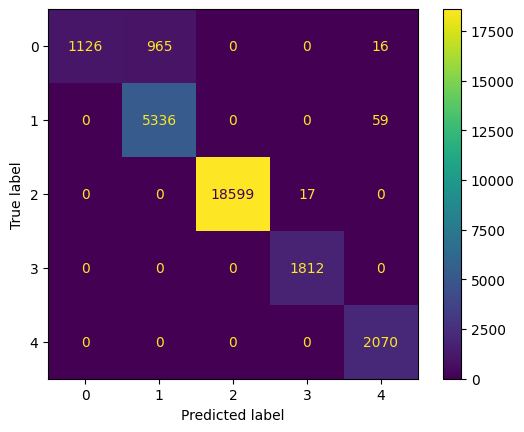

In [17]:
#%% -------------------------------------------------
# Results Comparison
# -------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("\n Model Comparison:\n")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

final_model = models[best_model_name]
final_model.fit(X, y)
y_test_pred = final_model.predict(x_test)

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

# Visualization of Results

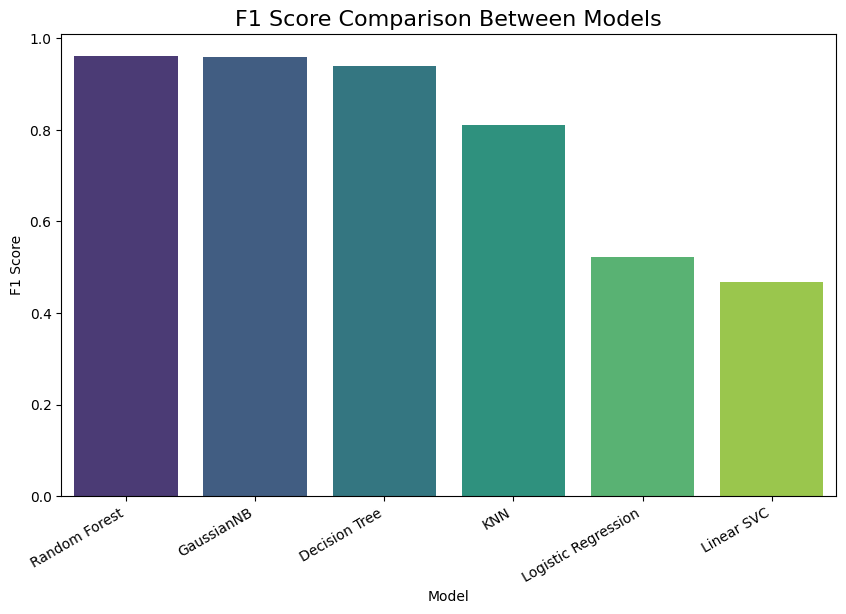

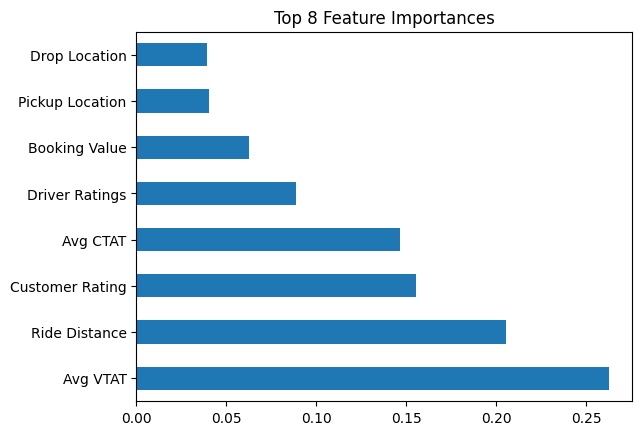

In [18]:
#%% -------------------------------------------------
# Visualization of Results
# -------------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='F1 Score', palette='viridis')
plt.xticks(rotation=30, ha='right')
plt.title('F1 Score Comparison Between Models', fontsize=16)
plt.show()

# Feature Importance (RandomForest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title('Top 8 Feature Importances')
plt.show()
